In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Product Recomendation system project/ratings_Beauty.csv")
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [ ]:
df.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
df.shape

(2023070, 4)

In [ ]:
#recomendation system p-1
#recomendation system based on product popularity for new customers
popular_products = pd.DataFrame(df.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

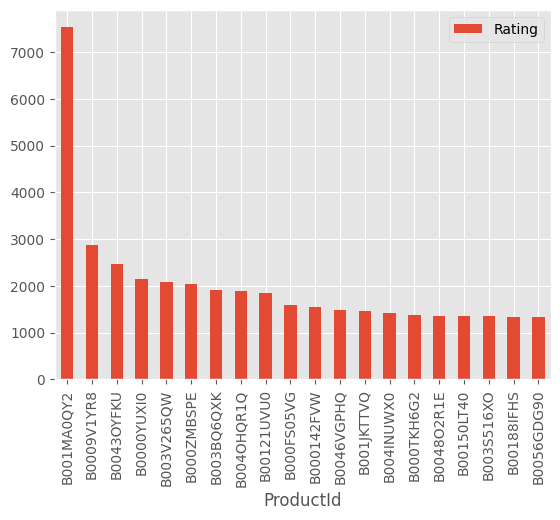

In [ ]:
most_popular.head(20).plot(kind = "bar")

In [ ]:
#Recommendation System - Part II
#Model-based collaborative filtering system

In [ ]:
amazon_ratings1 = df.head(10000)
amazon_ratings1.head(10)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


In [ ]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head(5)


ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings_utility_matrix.shape

(9697, 886)

In [ ]:
#traspose
X = ratings_utility_matrix.T
X.head()


UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
 X.shape

(886, 9697)

In [ ]:
#now finding unique product in new subset dataset
X1 = X

In [ ]:
#decomposing the matrix using svd 
import sklearn
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [ ]:
#finding corelation matix of the decomposiotion matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [ ]:
id=X.index[112]
print(id)
#here we assumed that a customer buys this product(id- 753865058X) random chosen

753865058X


In [ ]:
i = id

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

112

In [ ]:
#correlations between items to identify which other items are most likely to be of interest to a customer who has made a particular purchase.
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

#here we can get top 10 product by the recommendation system
# of the customer based on the purchase history
Recommend[0:9]

['5357956014',
 '9788071511',
 '9788071597',
 '9788076203',
 '9788077315',
 '9790770944',
 '9790774842',
 '9790779925',
 '9790785232']

**Recommendation System - Part III**
 (textual clustering analysis given in product description)

In [ ]:
product_descriptions=pd.read_csv("/content/drive/MyDrive/Product Recomendation system project/product_descriptions.csv")
product_descriptions.head(10)

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...
5,100006,Achieving delicious results is almost effortle...
6,100007,The Quantum Adjustable 2-Light LED Black Emerg...
7,100008,The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8,100009,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9,100010,Valley View Industries Metal Stakes (4-Pack) a...


In [ ]:
print(product_descriptions.isnull().sum())
print()
print(f"shape: {product_descriptions.shape}")

product_uid            0
product_description    0
dtype: int64

shape: (124428, 2)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
product_descriptions1 = product_descriptions.head(500)
product_descriptions1.iloc[:,1]

#product_descriptions1["product_description"].head(10)

0      Not only do angles make joints stronger, they ...
1      BEHR Premium Textured DECKOVER is an innovativ...
2      Classic architecture meets contemporary design...
3      The Grape Solar 265-Watt Polycrystalline PV So...
4      Update your bathroom with the Delta Vero Singl...
                             ...                        
495    Add an updated look to your transitional decor...
496    The BLACK+DECKER EM1700 corded electric lawn m...
497    Wilsonart's 48 in. x 96 in. Breccia Nouvelle L...
498    The new and improved roundup 2 gal. Multi-Purp...
499    Krosswood Doors dress up both the entrance int...
Name: product_description, Length: 500, dtype: object

In [ ]:
#feature extractions
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


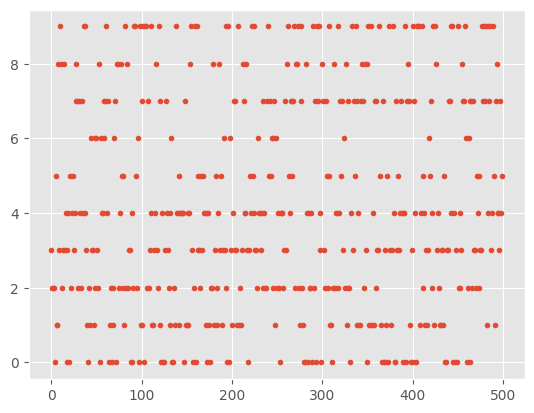

In [ ]:
#Visualizing product clusters
X=X1
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [ ]:
def print_cluster(i):
    print("Cluster %d:"  %i),
    for ind in order_centroids[i, :10]:
        print(' %s' %terms[ind]),
    print

In [ ]:
# # Optimal clusters is 


true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 nickel
 shelf
 kitchen
 vanity
 look
 steel
 decor
 home
 patio
 finished
Cluster 1:
 door
 dog
 wood
 resistant
 frame
 floor
 roof
 steel
 ft
 plastic
Cluster 2:
 air
 cooling
 fan
 insulation
 control
 power
 cool
 room
 unit
 filter
Cluster 3:
 wall
 storage
 shelves
 finish
 panels
 easy
 room
 ft
 adjustable
 lbs
Cluster 4:
 water
 easy
 use
 heater
 gal
 tank
 watering
 toilet
 provides
 design
Cluster 5:
 natural
 wood
 bamboo
 window
 outdoor
 rug
 patio
 size
 dining
 shades
Cluster 6:
 light
 watt
 led
 bulb
 bulbs
 power
 fixture
 mounting
 lighting
 switch
Cluster 7:
 ladder
 aluminum
 cutting
 design
 attic
 easy
 step
 ft
 use
 lightweight
Cluster 8:
 oven
 ft
 door
 easy
 cooking
 cycle
 cu
 wash
 steam
 piece
Cluster 9:
 metal
 tool
 20
 gauge
 tape
 concrete
 power
 impact
 work
 drill


In [ ]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [ ]:
show_recommendations("Doors")

Cluster 1:
 door
 dog
 wood
 resistant
 frame
 floor
 roof
 steel
 ft
 plastic


In [ ]:
show_recommendations("spray paint")

Cluster 4:
 water
 easy
 use
 heater
 gal
 tank
 watering
 toilet
 provides
 design


In [ ]:
show_recommendations("steel drill")

Cluster 9:
 metal
 tool
 20
 gauge
 tape
 concrete
 power
 impact
 work
 drill


In [ ]:
show_recommendations("water")

Cluster 4:
 water
 easy
 use
 heater
 gal
 tank
 watering
 toilet
 provides
 design
